In [1]:
from torchvision import datasets
data_path = 'data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)



Files already downloaded and verified
Files already downloaded and verified


In [2]:
#from matplotlib import pyplot as plt
from matplotlib import pyplot as plt

len(cifar10)
len(cifar10_val)
img,label=cifar10[1]
plt.imshow(img)
plt.show()


<Figure size 640x480 with 1 Axes>

In [3]:
len(cifar10)
from torchvision import transforms
dir(transforms)

#to_tensor = transforms.ToTensor()
#img_t = to_tensor(img)
#img_t.shape
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
 transform=transforms.ToTensor())


1

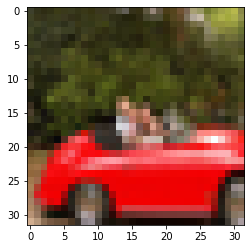

In [30]:
img_t, _ = tensor_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
img_t.permute(1, 2, 0).shape
_

In [5]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [6]:
print(imgs.view(3, -1).mean(dim=1))
print(imgs.view(3, -1).std(dim=1))

tensor([0.4915, 0.4823, 0.4468])
tensor([0.2470, 0.2435, 0.2616])


In [7]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
 transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))]))
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


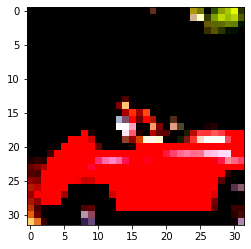

In [8]:
img_t, _ = cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [9]:
label_map={0:0,2:1}
class_names = ['airplane', 'bird']
cifar2=[(img, label_map[label]) for img, label in cifar10 if label in [0,2] ]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]


In [39]:
import torch.nn as nn
n_out=2
model= nn.Sequential(
        nn.Linear(3072,512,),
        nn.Tanh(),
        nn.Linear(512,n_out,),
        nn.LogSoftmax(dim=1)
      )

loss_fn = nn.NLLLoss()

In [ ]:
#check

def softmax(x):
 return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
 [1.0, 2.0, 3.0]])
softmax(x)

In [ ]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))

print(out)
print(torch.tensor([label]))

out-torch.tensor([label])
loss(out, torch.tensor([label]))


In [ ]:
img_batch = img.view(-1).unsqueeze(0)
out = model(img_batch)

In [15]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)



In [40]:
import torch.optim as optim

print(len(cifar2))
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 100
for epoch in range(n_epochs):
      for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      print("Epoch: %d, Loss: %f" % (epoch, float(loss)))


10000
Epoch: 0, Loss: 0.428607
Epoch: 1, Loss: 0.399441
Epoch: 2, Loss: 0.605890
Epoch: 3, Loss: 0.448152
Epoch: 4, Loss: 0.627773
Epoch: 5, Loss: 0.511513
Epoch: 6, Loss: 0.374141
Epoch: 7, Loss: 0.377351
Epoch: 8, Loss: 0.351803
Epoch: 9, Loss: 0.230886
Epoch: 10, Loss: 0.394444
Epoch: 11, Loss: 0.324049
Epoch: 12, Loss: 0.407406
Epoch: 13, Loss: 0.172562
Epoch: 14, Loss: 0.318452
Epoch: 15, Loss: 0.326072
Epoch: 16, Loss: 0.608959
Epoch: 17, Loss: 0.277999
Epoch: 18, Loss: 0.279768
Epoch: 19, Loss: 0.099608
Epoch: 20, Loss: 0.177448
Epoch: 21, Loss: 0.192958
Epoch: 22, Loss: 0.245379
Epoch: 23, Loss: 0.229169
Epoch: 24, Loss: 0.240401
Epoch: 25, Loss: 0.197273
Epoch: 26, Loss: 0.214731
Epoch: 27, Loss: 0.338676
Epoch: 28, Loss: 0.108458
Epoch: 29, Loss: 0.276919
Epoch: 30, Loss: 0.232021
Epoch: 31, Loss: 0.276517
Epoch: 32, Loss: 0.066228
Epoch: 33, Loss: 0.153310
Epoch: 34, Loss: 0.107838
Epoch: 35, Loss: 0.121423
Epoch: 36, Loss: 0.185388
Epoch: 37, Loss: 0.078780
Epoch: 38, Loss:

In [41]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

    print("Accuracy: %f", correct / total)

Accuracy: %f 0.8165
